## Лабораторная работа по курсу "Искусственный интеллект"
## Многослойный персептрон

| Студент | Рыженко |
|---------|--------|
| Группа  | 8      |

Подключаем необходимые библиотеки

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.datasets import mnist
from keras import utils
import matplotlib.pyplot as plt

Загружаем базу данных MNIST

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(len(x_train), 784)
x_train = x_train.astype("float32")
x_test = x_test.reshape(len(x_test), 784)
x_test = x_test.astype("float32")
y_train = utils.to_categorical(y_train, 10)
for i in range(len(x_test)):
    for j in range(784):
        x_test[i][j] /= 255.0
        x_train[i][j] /= 255.0

Создаем нейросеть с входным слоем 784 нейрона, следующем слоем 30 нейронов и еще слоем 20 нейронов (функция активации tanh), заканчивая модель 10 выходными нейронами (функция активации softmax)

In [4]:
model = keras.Sequential([
	keras.layers.Dense(30, input_dim=784, activation="tanh"),
	keras.layers.Dense(20, input_dim=784, activation="tanh"),
	keras.layers.Dense(10, activation="softmax")
	])

Компилируем нейросеть используя оптимизатор adam и функцию потерь mean_squared_error

In [5]:
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy'])

Обучаем модель

In [6]:
his = model.fit(x_train, y_train, batch_size=200, epochs=15)

Epoch 1/15
300/300 [==============================] - 3s 5ms/step - loss: 0.0615 - accuracy: 0.5486
Epoch 2/15
300/300 [==============================] - 1s 5ms/step - loss: 0.0250 - accuracy: 0.8435
Epoch 3/15
300/300 [==============================] - 1s 5ms/step - loss: 0.0207 - accuracy: 0.8622
Epoch 4/15
300/300 [==============================] - 1s 5ms/step - loss: 0.0194 - accuracy: 0.8717
Epoch 5/15
300/300 [==============================] - 1s 4ms/step - loss: 0.0176 - accuracy: 0.8842
Epoch 6/15
300/300 [==============================] - 1s 4ms/step - loss: 0.0165 - accuracy: 0.8910
Epoch 7/15
300/300 [==============================] - 1s 5ms/step - loss: 0.0165 - accuracy: 0.8909
Epoch 8/15
300/300 [==============================] - 1s 4ms/step - loss: 0.0168 - accuracy: 0.8882
Epoch 9/15
300/300 [==============================] - 1s 4ms/step - loss: 0.0169 - accuracy: 0.8900
Epoch 10/15
300/300 [==============================] - 1s 4ms/step - loss: 0.0158 - accuracy: 0.8966

Получили обученную нейросеть. Посмотрим как изменялась лосс функция в течение обучения

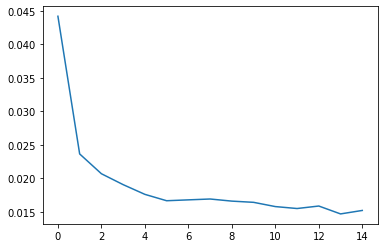

In [7]:
plt.plot(his.history['loss'])
plt.show()

И построим матрицу неточности 

In [8]:
y_pred=model.predict_classes(x_test)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
print(con_mat)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
[[ 954    0    1    2    2    6   10    3    2    0]
 [   0 1112    2    3    1    0    5    1   11    0]
 [  13    4  920   25   16    2   10   14   27    1]
 [   3    2    8  902    0   50    2   10   24    9]
 [   1    7    5    1  928    0   10    2    3   25]
 [   8    1    4   22   11  813   10    4   11    8]
 [  14    3    4    1    9   22  897    0    8    0]
 [   1   13   18    1    9    0   

Это был единичный случай. Рассмотрим нейросеть с другими гиперпараметрами.
Я рассмотрел такие нейросети: 1 скрытый слой с 10 нейронами, 2 скрытых слоя с 10 нейронами, 2 скрытых слоя: 1 с 30 нейронами, второй с 20, 3 скрытых слоя: 1 слой с 30 нейронами, второй с 20 нейронами и третий тоже с 20 нейронами и, наконец, 2 скрытых слоя: 1 слой с 300 нейронами и 2 с 200. Также для каждой подобной нейросети я расмотрел три различные функции активации для каждого слоя (кроме последнего): sigmoid, relu, tanh.
Результаты:

для функций активации sigmoid:

| нейросеть | accuracy |
|-----------|----------|
| 10    |0.9234         |
| 10-10    |0.9143         |
| 30-20    |0.9647         |
| 30-20-20    |0.9692         |
| 300-200    |0.9983         |

для функций активации relu:

| нейросеть | accuracy |
|-----------|----------|
| 10    |0.9437         |
| 10-10    |0.9443         |
| 30-20    |0.9817         |
| 30-20-20    |0.9831         |
| 300-200    |0.9980         |

для функций активации tanh:

| нейросеть | accuracy |
|-----------|----------|
| 10    |0.9406         |
| 10-10    |0.9437         |
| 30-20    |0.9863         |
| 30-20-20    |0.9881         |
| 300-200    |0.9998         |


Также я использовал нейросеть с двумя скрытыми слоями 30-20 и проанализировал ее обучение для различных функций потерь

categorical_crossentropy

<img src="solution/cc.jpg">

mean_square

<img src="solution/ms.jpg">

mean_absolute

<img src="solution/ma.jpg">
